# Systems of axial bars

### Example from course reader

In [1]:
from FEA.FEA import *

assembly_mat_1 = np.array([[0, 0, 1, 0], [0, 0, 0, 1]])
assembly_mat_2 = np.array([[0, 0, 1, 0], [0, 0, 0, 1]])

element1 = BarElement(assembly_mat_1, 200e9, 10, (np.pi * (0.1 ** 2)) / 4, 0)
element2 = BarElement(assembly_mat_2, 200e9, 10 * 1.41, (np.pi * (0.1 ** 2)) / 4, 45)

Q = np.array([[0], [100e3]]) # external force vector

structure = Structure([element1, element2], Q)

structure.solve()

for element in structure.elements:
    print(element.global_force)

[[ 100000.]
 [      0.]
 [-100000.]
 [      0.]]
[[-100000.]
 [-100000.]
 [ 100000.]
 [ 100000.]]


# Question 3

In [2]:
assembly_mat_1 = np.array([[0, 0, 1, 0], [0, 0, 0, 1]])
assembly_mat_2 = np.array([[1, 0, 0, 0], [0, 1, 0, 0]])

element1 = BarElement(assembly_mat_1, 200e9, 1.1, 400e-6, 0)
element2 = BarElement(assembly_mat_2, 200e9, 0.8, 600e-6, 55)

Q = np.array([[0], [-20e3]]) # external force vector

structure = Structure([element1, element2], Q)

structure.solve()

for element in structure.elements:
    print(element.global_force)

[[-14004.15076419]
 [     0.        ]
 [ 14004.15076419]
 [     0.        ]]
[[-14004.15076419]
 [-20000.        ]
 [ 14004.15076419]
 [ 20000.        ]]


### choosing a different orientation (different assembly matrices)

In [4]:
assembly_mat_1 = np.array([[1, 0, 0, 0], [0, 1, 0, 0]])
assembly_mat_2 = np.array([[0, 0, 1, 0], [0, 0, 0, 1]])

element1 = BarElement(assembly_mat_1, 200e9, 1.1, 400e-6, 0)
element2 = BarElement(assembly_mat_2, 200e9, 0.8, 600e-6, 55)

Q = np.array([[0], [-20e3]]) # external force vector

structure = Structure([element1, element2], Q)

structure.solve()

### Plotting the deformed shape graph

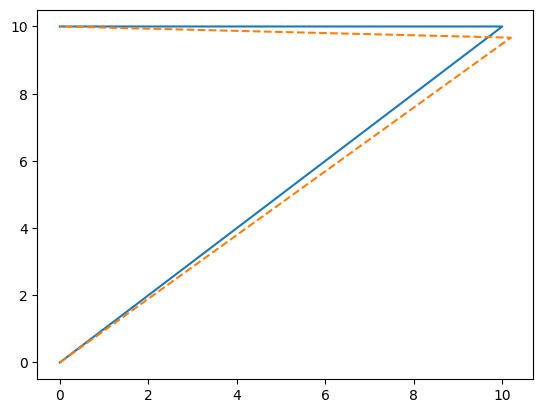

In [5]:
import matplotlib.pyplot as plt

mag = 1000

q1 = structure.q[:,0][0] * mag
q2 = structure.q[:,0][1] * mag

points = np.array([[0, 0], [10, 10], [0, 10]])
deflected_points =  np.array([[0, 0], [10 + q1, 10 + q2], [0, 10]])

plt.plot(points[:,0], points[:,1])
plt.plot(deflected_points[:,0], deflected_points[:,1], '--')

plt.show()